#### The task here is to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. 

Data Dictionary

S.No.: Serial number

Name: Name of the car which includes brand name and model name

Location: Location in which the car is being sold or is available for purchase

Year: Manufacturing year of the car

Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)

Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

Transmission: The type of transmission used by the car (Automatic/Manual)

Owner: Type of ownership

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in CC

Power: The maximum power of the engine in bhp

Seats: The number of seats in the car

New_Price: The price of a new car of the same model in dollars

Price: The price of the used car in dollars

In [381]:
# Libraries o help with reading and manipulating data
import numpy as np
import pandas as pd
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
# libraries to help with data visulization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_row", 200)

# to split the data into train and test
from sklearn.linear_model import LinearRegression, Lasso

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Loading the data

In [382]:
data = pd.read_csv(r'used_cars_data-1.csv') # read the data in pandas

In [383]:
data.head() # checking the content of the data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [384]:
df = data.copy() # copying the data

In [385]:
print(f' This data holds {df.shape[0]} rows and {df.shape[1]} columns') # num of rows and columns

 This data holds 7253 rows and 14 columns


In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


#### Observations:
    - From the above I observed that the data contains some miising values
    - Mileage, Engine and power columns are represented as objects
    - Seats column is meant to be a whole number but it is represented as floats

In [387]:
# Data set summary

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations
    - Mhinrdra is the name of the most used cars in India
    - Most cars in india are in Mumbai
    - Most cars use diesel Fuel type
    - Maximum Kilometers_Driven by a car is 6500000.0, higher than the mean. 
    -

In [388]:
# Removing the units from mileage, Engine and Power columns
df["Mileage"] = df["Mileage"].replace("\D", "", regex = True)
df["Engine"] = df["Engine"].replace("\D", "", regex = True)
df["Power"] = df["Power"].replace("\D", "", regex = True)

In [389]:
# inputting the units on the column header
df.columns = ['S.No.','Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type',
             'Mileage (km/kg)', 'Engine (CC)', 'Power (bhp)','Seats','New_Price','Price']
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

In [390]:
df.head()

,s.no.,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,266,998,5816,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1967,1582,1262,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,182,1199,887,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,2077,1248,8876,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,152,1968,1408,5.0,53.14,17.74


### Cleaning the Data

In [391]:
# dropping the 'S.No. column, not needed'
df.drop('s.no.', axis = 1, inplace = True)

In [392]:
# checking for null values

df.isnull().sum()

name                    0
location                0
year                    0
kilometers_driven       0
fuel_type               0
transmission            0
owner_type              0
mileage_(km/kg)         2
engine_(cc)            46
power_(bhp)           175
seats                  53
new_price               0
price                1234
dtype: int64

##### The main purpose of this project is to predict price, to prevent model bias, I will have to drop the null values in price column

In [393]:
df.dropna(subset = ['price'],inplace = True) # drop null values in the target column

In [394]:
#df.isnull().sum() # check sum of null values

In [395]:
# I am dropping the null values in Mileage, Engine and Power column, these features are
# dependant on various factors and car usage.
df.dropna(subset = ['mileage_(km/kg)'],inplace = True)
df.dropna(subset = ['engine_(cc)'],inplace = True)
df.dropna(subset = ['power_(bhp)'],inplace = True)
df.dropna(subset= ['seats'], inplace=True)

In [396]:
#df.isnull().sum() # check sum of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5872 non-null   object 
 1   location           5872 non-null   object 
 2   year               5872 non-null   int64  
 3   kilometers_driven  5872 non-null   int64  
 4   fuel_type          5872 non-null   object 
 5   transmission       5872 non-null   object 
 6   owner_type         5872 non-null   object 
 7   mileage_(km/kg)    5872 non-null   object 
 8   engine_(cc)        5872 non-null   object 
 9   power_(bhp)        5872 non-null   object 
 10  seats              5872 non-null   float64
 11  new_price          5872 non-null   float64
 12  price              5872 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 642.2+ KB


In [397]:
df.isnull().sum()

name                 0
location             0
year                 0
kilometers_driven    0
fuel_type            0
transmission         0
owner_type           0
mileage_(km/kg)      0
engine_(cc)          0
power_(bhp)          0
seats                0
new_price            0
price                0
dtype: int64

In [398]:
# converting to appropriate types
df['mileage_(km/kg)'] = df['mileage_(km/kg)'].astype(float) # convert to float type
df['engine_(cc)'] = df['engine_(cc)'].astype(int) # convert to integer type
df['power_(bhp)'] = df['power_(bhp)'].astype(float) # convert to integer type
#df['seats'] = df['seats'].astype(int) # convert to integer type
df['year'] = df['year'].astype(str) # convert to integer type
df['seats'] = df['seats'].astype(int)

In [399]:
df['seats'].value_counts()

5     4919
7      672
8      133
4       99
6       29
2       13
10       4
9        3
Name: seats, dtype: int64

In [400]:
# Data set summary

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,5872,1811,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5872,11,Mumbai,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,5872,22,2014,794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kilometers_driven,5872.0,NaN,NaN,NaN,58316.999149,92169.410006,171.0,33422.5,52609.0,72402.75,6500000.0
fuel_type,5872,4,Diesel,3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,5872,2,Manual,4170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner_type,5872,4,First,4839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage_(km/kg),5872.0,NaN,NaN,NaN,868.683072,861.102551,0.0,175.0,231.0,1701.0,3354.0
engine_(cc),5872.0,NaN,NaN,NaN,1625.745572,601.641783,624.0,1198.0,1495.5,1991.0,5998.0
power_(bhp),5872.0,NaN,NaN,NaN,2741.920811,5010.890119,35.0,140.0,838.0,1685.0,108495.0


In [401]:
# mileage has 0, which is not right. replacing the 0 with nan and filling with the median
df['mileage_(km/kg)'].replace(0, value = np.nan, inplace = True)

In [402]:
df['mileage_(km/kg)'].fillna(df['mileage_(km/kg)'].median(), inplace = True)

In [403]:
## Check

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,5872,1811,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5872,11,Mumbai,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,5872,22,2014,794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kilometers_driven,5872.0,NaN,NaN,NaN,58316.999149,92169.410006,171.0,33422.5,52609.0,72402.75,6500000.0
fuel_type,5872,4,Diesel,3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,5872,2,Manual,4170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner_type,5872,4,First,4839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage_(km/kg),5872.0,NaN,NaN,NaN,869.784571,860.13769,64.0,176.0,231.0,1701.0,3354.0
engine_(cc),5872.0,NaN,NaN,NaN,1625.745572,601.641783,624.0,1198.0,1495.5,1991.0,5998.0
power_(bhp),5872.0,NaN,NaN,NaN,2741.920811,5010.890119,35.0,140.0,838.0,1685.0,108495.0


In [404]:
# There are 1812 unique names of car, we can group this into sport car, truck and family car, but i will drop this because
# it is of no use to our model

del df['name']

In [405]:
duplicate = df.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1 duplicated rows in the data


In [406]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

In [407]:
df.head()

,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price
0,Mumbai,2010,72000,CNG,Manual,First,266.0,998,5816.0,5,5.51,1.75
1,Pune,2015,41000,Diesel,Manual,First,1967.0,1582,1262.0,5,16.06,12.50
2,Chennai,2011,46000,Petrol,Manual,First,182.0,1199,887.0,5,8.61,4.50
3,Chennai,2012,87000,Diesel,Manual,First,2077.0,1248,8876.0,7,11.27,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,152.0,1968,1408.0,5,53.14,17.74


In [408]:
df.shape

(5871, 12)

In [409]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
location,5871,11,Mumbai,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,5871,22,2014,794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kilometers_driven,5871.0,NaN,NaN,NaN,58318.041901,92177.225919,171.0,33420.0,52618.0,72405.5,6500000.0
fuel_type,5871,4,Diesel,3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,5871,2,Manual,4169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner_type,5871,4,First,4838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage_(km/kg),5871.0,NaN,NaN,NaN,869.899165,860.166123,64.0,176.0,231.0,1701.0,3354.0
engine_(cc),5871.0,NaN,NaN,NaN,1625.886902,601.595539,624.0,1198.0,1496.0,1991.0,5998.0
power_(bhp),5871.0,NaN,NaN,NaN,2742.308976,5011.228632,35.0,140.0,838.0,1685.0,108495.0
seats,5871.0,NaN,NaN,NaN,5.283768,0.805141,2.0,5.0,5.0,5.0,10.0


In [410]:
df[df['mileage_(km/kg)']==0]

,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price


In [411]:
# corr check

In [412]:
# separating the numerical from categorical data
categorical = df.select_dtypes(include= ["object"]).columns
numerical = df.select_dtypes(include=np.number).columns

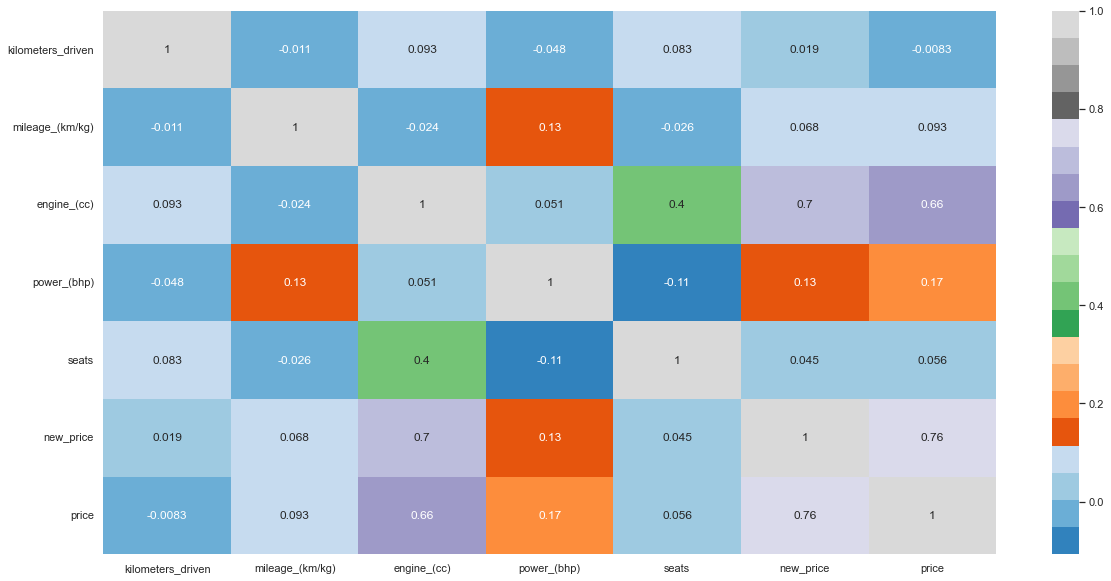

In [413]:
plt.figure(figsize=(20,10))

corr =  df[numerical].corr()

corr = df[numerical].corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

Engine and New Price are hghly correlated with the Price

In [414]:
# my_numeric_df = df.select_dtypes(exclude ='object') # obtains the numerical data type
# my_numeric_df

In [415]:
# my_object_df = df.select_dtypes(include = 'object') # obtains all the datatypes that are objects
# my_object_df

### Visualization Analysis

Univariate analysis of categorical features

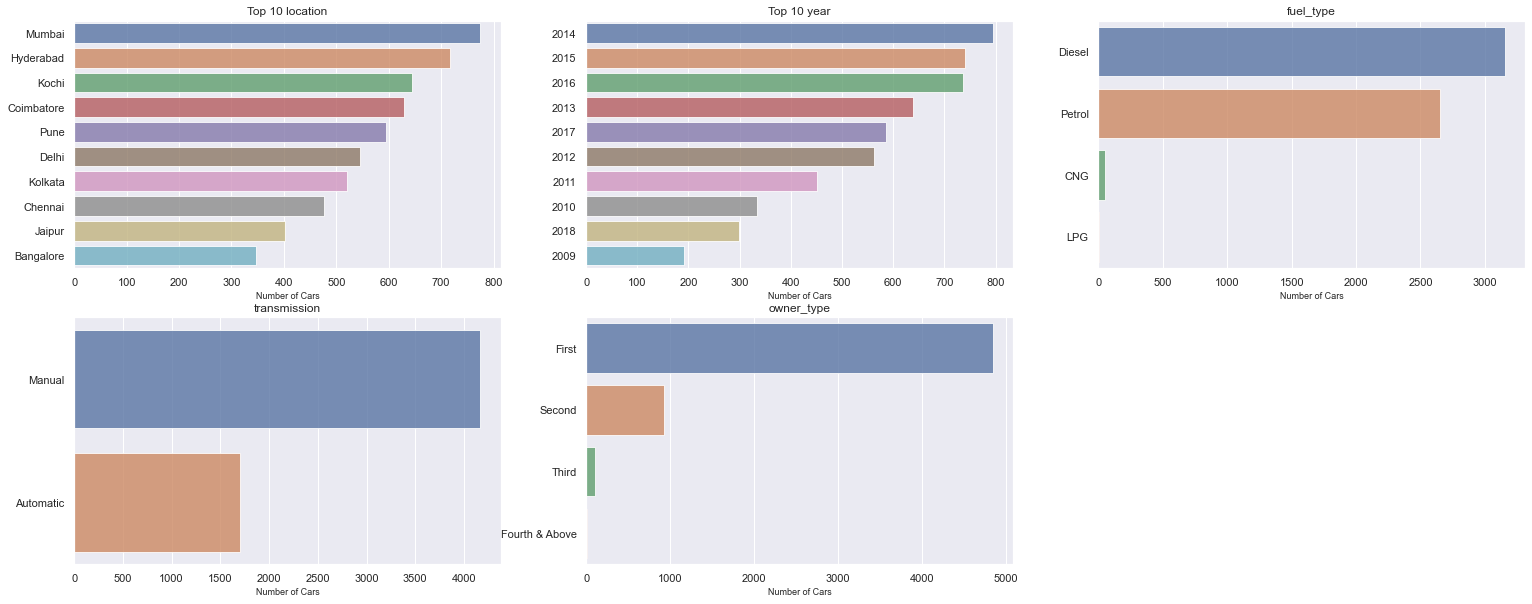

In [416]:
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(26, 10)) 

for variable, subplot in zip(categorical,ax.flatten()):
    cat_count  = df[variable].value_counts()
    cat_count10 = cat_count[:10,]
    z = sns.barplot(cat_count10.values,cat_count10.index, alpha=0.8, ax=subplot)
    if cat_count.size > 10:
        z.set_title('Top 10 {}'.format(variable))
    else:
        z.set_title(variable)
    z.set_xlabel('Number of Cars', fontsize=9)
    
fig.delaxes(ax[1][2])

Top 10 Location of cars is Mumbai

Top 10 year of car model is 2014

Top Fuel type is Diesel

Top transmission is Manual

Top Owner type is First

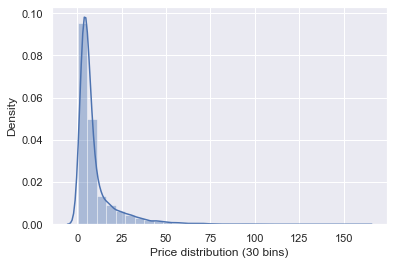

In [417]:
sns.distplot(df['price'], bins=30, kde=True, axlabel='Price distribution (30 bins)')
plt.show()

From the above histograme Price is right skewed

In [418]:
mean = df['price'].mean()
mode = df['price'].mode()
median = df['price'].median()

print(f'Mean for price is {(mean)}')
print(f'Median for price is {median}')
print(f'Mode for price is {mode}')

Mean for price is 9.605256344745348
Median for price is 5.75
Mode for price is 0    4.5
dtype: float64


In [419]:
#check to see if the target has 0
df[df['price'] == 0]

,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price


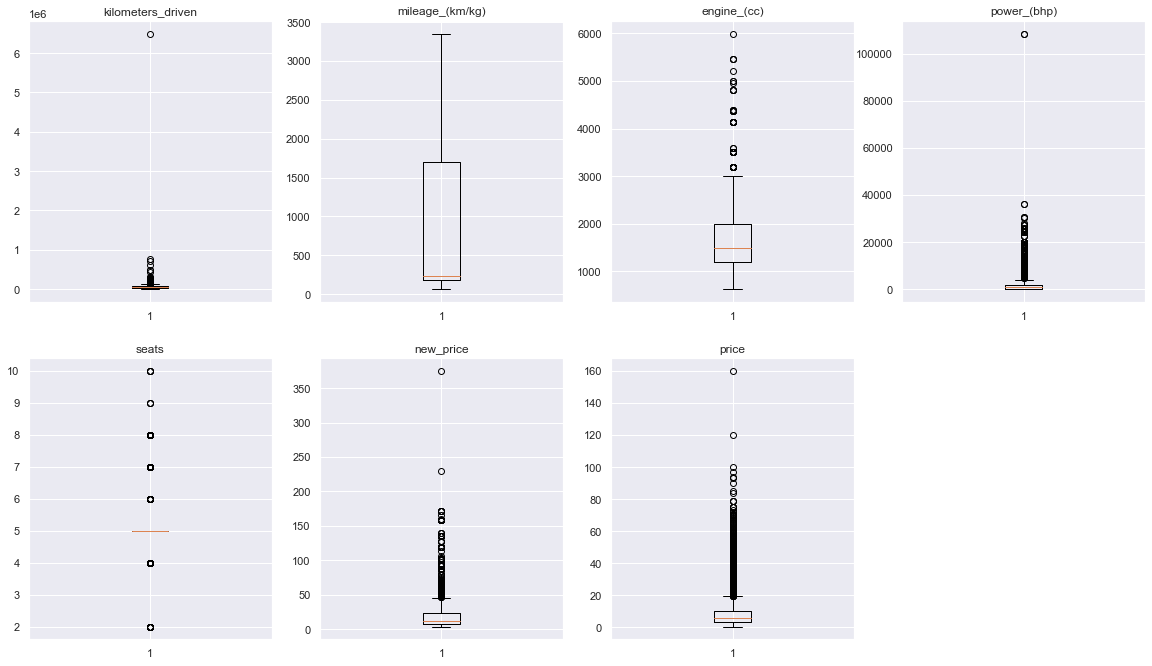

In [420]:
# check for outliers in the numerical column
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical):
    plt.subplot(5,4, i +1)
    plt.boxplot(df[variable])
    plt.title(variable)

plt.show()

From the above we can see we have so many outliers in the numercial columns and our target

to treat this i will have to clip the vaues to the minmum and maximums as shown from the box 

### Outlier Treatment

In [421]:
# clipping values to minimum and maximum

l1 = [0.4, 11000, 0.4 , 40000]

# use np.clip function

np.clip(l1,0.4,11000)

array([4.0e-01, 1.1e+04, 4.0e-01, 1.1e+04])

In [422]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col:  str, name of the numerical variable
    df: data frame
    col: name of the column    
    """
    
    Q1 = df[col].quantile(0.25) #25th quantile
    Q3 = df[col].quantile(0.75) # 75th quantile
    IQR = Q3 - Q1
    
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    # all the values smaller than Lower_whisker will be assigned value
    
    return df



def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df


In [423]:
# treating the outliers

df = treat_outliers_all(df, numerical)

<function matplotlib.pyplot.show(close=None, block=None)>

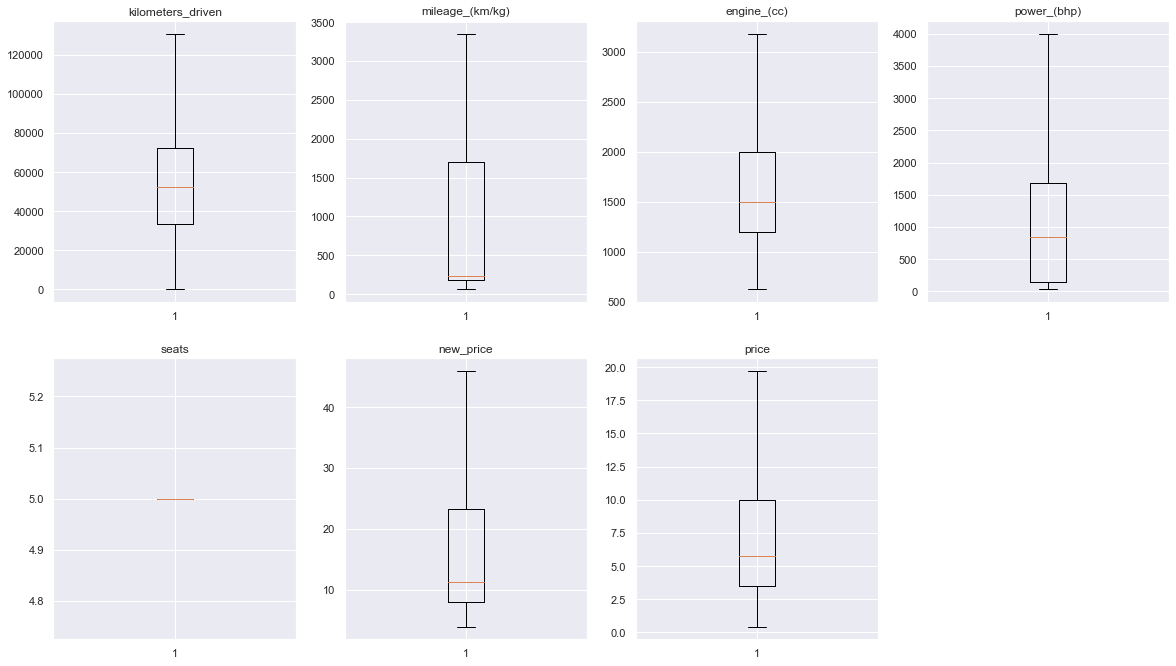

In [424]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical):
    plt.subplot(5,4,i+1)
    plt.boxplot(df[variable], whis = 1.5)
    plt.title(variable)
    
plt.show

In [425]:
my_numeric_df = df.select_dtypes(exclude ='object') # obtains the numerical data type
my_numeric_df

,kilometers_driven,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,price
0,72000.0,266.0,998.0,4002.5,5.0,5.510,1.75
1,41000.0,1967.0,1582.0,1262.0,5.0,16.060,12.50
2,46000.0,182.0,1199.0,887.0,5.0,8.610,4.50
3,87000.0,2077.0,1248.0,4002.5,5.0,11.270,6.00
4,40670.0,152.0,1968.0,1408.0,5.0,45.965,17.74
...,...,...,...,...,...,...,...
5866,27365.0,284.0,1248.0,74.0,5.0,7.880,4.75
5867,100000.0,244.0,1120.0,71.0,5.0,8.230,4.00
5868,55000.0,140.0,2498.0,112.0,5.0,11.670,2.90
5869,46000.0,189.0,998.0,671.0,5.0,5.510,2.65


In [426]:
my_object_df = df.select_dtypes(include = 'object') # obtains all the datatypes that are objects
my_object_df

,location,year,fuel_type,transmission,owner_type
0,Mumbai,2010,CNG,Manual,First
1,Pune,2015,Diesel,Manual,First
2,Chennai,2011,Petrol,Manual,First
3,Chennai,2012,Diesel,Manual,First
4,Coimbatore,2013,Diesel,Automatic,Second
...,...,...,...,...,...
5866,Delhi,2014,Diesel,Manual,First
5867,Jaipur,2015,Diesel,Manual,First
5868,Jaipur,2012,Diesel,Manual,Second
5869,Kolkata,2013,Petrol,Manual,First


### Linear Model Building

In [427]:
X = df.drop('price', axis =1)

y = df['price']

In [428]:
X

,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price
0,Mumbai,2010,72000.0,CNG,Manual,First,266.0,998.0,4002.5,5.0,5.510
1,Pune,2015,41000.0,Diesel,Manual,First,1967.0,1582.0,1262.0,5.0,16.060
2,Chennai,2011,46000.0,Petrol,Manual,First,182.0,1199.0,887.0,5.0,8.610
3,Chennai,2012,87000.0,Diesel,Manual,First,2077.0,1248.0,4002.5,5.0,11.270
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,152.0,1968.0,1408.0,5.0,45.965
...,...,...,...,...,...,...,...,...,...,...,...
5866,Delhi,2014,27365.0,Diesel,Manual,First,284.0,1248.0,74.0,5.0,7.880
5867,Jaipur,2015,100000.0,Diesel,Manual,First,244.0,1120.0,71.0,5.0,8.230
5868,Jaipur,2012,55000.0,Diesel,Manual,Second,140.0,2498.0,112.0,5.0,11.670
5869,Kolkata,2013,46000.0,Petrol,Manual,First,189.0,998.0,671.0,5.0,5.510


In [429]:
# since some of the columns are object type, we do one hot encoding
# creating dummies


X = pd.get_dummies(X, drop_first=True) # the dropping is done alphabethically

X.shape

(5871, 44)

In [430]:
X

,kilometers_driven,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,transmission_Manual,owner_type_Fourth & Above,owner_type_Second,owner_type_Third
0,72000.0,266.0,998.0,4002.5,5.0,5.510,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,41000.0,1967.0,1582.0,1262.0,5.0,16.060,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,46000.0,182.0,1199.0,887.0,5.0,8.610,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,87000.0,2077.0,1248.0,4002.5,5.0,11.270,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,40670.0,152.0,1968.0,1408.0,5.0,45.965,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5866,27365.0,284.0,1248.0,74.0,5.0,7.880,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
5867,100000.0,244.0,1120.0,71.0,5.0,8.230,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
5868,55000.0,140.0,2498.0,112.0,5.0,11.670,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
5869,46000.0,189.0,998.0,671.0,5.0,5.510,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


### Splitting the data

In [431]:
from sklearn.model_selection import train_test_split

In [432]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # using 20% of the data for testing

In [433]:
print("Number of rows in train data =", X_train.shape[0])
print('Number of rows in test data =', X_test.shape[0])

Number of rows in train data = 4696
Number of rows in test data = 1175


### Normaliza the data

In [434]:
from sklearn.preprocessing import MinMaxScaler

In [435]:
# create an instance of the scaler
scaler = MinMaxScaler()

In [436]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [437]:
# fitting the linear model

lin_reg = LinearRegression()

In [438]:
#numerical

In [439]:
# Training the model

lin_reg.fit(X_train_sc,y_train )

LinearRegression()

In [440]:
lin_reg.coef_ # The model coefficients.

array([-1.92864120e+00, -2.26365940e-01,  4.95662709e+00,  7.68330382e-02,
       -1.11909848e+14,  1.08800673e+01,  6.64292081e-01,  6.65718939e-02,
        4.37808605e-01, -5.08755973e-01,  5.31330123e-01, -9.70687370e-02,
       -3.25906316e-01, -1.27318884e+00, -5.88206714e-01, -1.37671107e-01,
        2.22501825e+00,  2.66854407e+00,  1.49599757e+00,  1.45128219e+00,
        7.21643583e-01,  1.00817836e+00,  3.24371141e-01,  1.74950568e+00,
        1.63946522e+00,  1.54068810e+00,  1.98666108e+00,  2.87744936e+00,
        3.34838991e+00,  4.17596873e+00,  4.89099244e+00,  5.53841307e+00,
        6.24330460e+00,  6.82103172e+00,  7.50050120e+00,  7.98264684e+00,
        7.90045693e+00,  4.58649530e-01,  7.33302676e-01, -3.03657012e-01,
       -1.06034377e+00, -7.20977316e-01, -3.14312830e-01, -6.07289922e-01])

In [441]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape
        },
        index=[0],
    )

    return df_perf

In [442]:
model_train_pf = model_performance_regression(lin_reg, X_train_sc, y_train)

In [443]:
model_train_pf # on the training data

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.898521,1.385972,0.891478,0.890452,29.667493


#### OBSERVATIONS

The model has 89% r-squared score in predicting the output(Price)


The model has RMSE and MAE error > 1 and this can be intepreted as not learning, the aim is to have error ratings of 0 to 1

In [444]:
model_test_pf = model_performance_regression(lin_reg, X_test_sc, y_test)

In [445]:
model_test_pf # on the test data

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.914888,1.379917,0.894777,0.89068,28.007446


In [446]:
print("Training Accuracy: {:.3f}".format(lin_reg.score(X_train_sc, y_train)))
print("Test Accuracy: {:.3f}".format(lin_reg.score(X_test_sc, y_test)))

Training Accuracy: 0.891
Test Accuracy: 0.895


In [447]:
pred = lin_reg.predict(X_test_sc)
r2_score(y_test,pred)

0.8947770350549664

### Using Lasso Regression

In [448]:
lasso = Lasso()

lasso.fit(X_train_sc, y_train)

Lasso()

In [449]:
lasso_train_pf = model_performance_regression(lasso, X_train_sc, y_train)

In [450]:
lasso_train_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.291265,3.445891,0.445557,0.440312,77.177949


In [451]:
# something is wrong with my model

 ### Forward Feature Selection

In [452]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [453]:
sfx = SequentialFeatureSelector(estimator= lin_reg,
                               k_features= X_train.shape[1],
                               n_jobs= -1,
                               verbose= 2)
sfx.fit(X_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    2.9s finished

[2023-02-05 14:45:50] Features: 1/44 -- score: 0.7095811751550353[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.2s finished

[2023-02-05 14:45:51] Features: 2/44 -- score: 0.7510812375736762[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.2s finished

[2023-02-05 14:45:51] Features: 3/44 -- score: 0.7825793287447216[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.2s finished

[2023-02-05 14:45:52] Features: 4/44 -- score: 0.7942230729372708[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished



[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2023-02-05 14:46:07] Features: 36/44 -- score: 0.888167703502852[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2023-02-05 14:46:07] Features: 37/44 -- score: 0.8881059686802066[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2023-02-05 14:46:07] Features: 38/44 -- score: 0.8880407043339325[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(44, 44),
                          n_jobs=-1, scoring='r2', verbose=2)

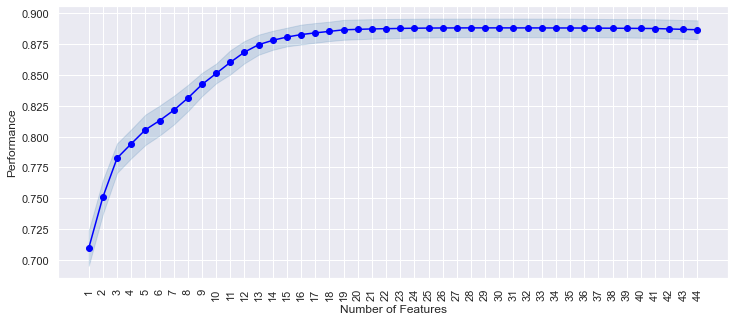

In [454]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfx.get_metric_dict(), kind="std_err", figsize = (12, 5))
plt.xticks(rotation = 90)
plt.show()

From the above diagram, I will 17 k_features value, because beyond this value, their is little improvements

In [455]:
sfs = SequentialFeatureSelector(estimator=lin_reg,
                               k_features=17,
                               n_jobs=-1,
                               verbose=2)
sfs.fit(X_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  44 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.1s finished

[2023-02-05 14:46:10] Features: 1/17 -- score: 0.7095811751550353[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  43 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.2s finished

[2023-02-05 14:46:10] Features: 2/17 -- score: 0.7510812375736762[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.2s finished

[2023-02-05 14:46:11] Features: 3/17 -- score: 0.7825793287447216[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.2s finished

[2023-02-05 14:46:11] Features: 4/17 -- score: 0.79

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(17, 17),
                          n_jobs=-1, scoring='r2', verbose=2)

In [456]:
feat_cols = list(sfs.k_feature_idx_) #index of the feature in the original data, converting it to list

In [457]:
# select the important features in training and test sets
X_train_new = X_train[X_train.columns[feat_cols]]
X_test_new = X_test[X_train.columns[feat_cols]]

In [458]:
# we also need to normalize the new train and test sets


scaler_new = MinMaxScaler() #instance
X_train_new_sc = scaler_new.fit_transform(X_train_new)
X_test_new_sc = scaler_new.transform(X_test_new)

### Re-build the models with the new features

In [459]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_new_sc,y_train)


LinearRegression()

In [460]:
model_performance_regression(lin_reg2, X_test_new_sc,y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.96451,1.415104,0.889253,0.887626,28.429191


### Trying with only numerical column

In [461]:
X = my_numeric_df.drop(['price'], axis = 1)
y = my_numeric_df['price']

In [462]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # using 20% of the data for testing

In [463]:
 X_train

,kilometers_driven,mileage_(km/kg),engine_(cc),power_(bhp),seats,new_price
3853,53886.0,2517.0,799.0,533.0,5.0,4.780
5256,76414.0,258.0,1498.0,986.0,5.0,8.540
1430,9500.0,1462.0,1999.0,4002.5,5.0,21.770
3581,10000.0,1927.0,2143.0,4002.5,5.0,45.965
1270,31000.0,1705.0,1995.0,190.0,5.0,45.965
...,...,...,...,...,...,...
4931,67559.0,194.0,1198.0,868.0,5.0,6.620
3264,32720.0,230.0,1396.0,90.0,5.0,10.250
1653,90000.0,109.0,2499.0,143.0,5.0,35.290
2607,26400.0,231.0,998.0,4002.5,5.0,5.870


In [464]:
## Scale
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [465]:
model = LinearRegression()

In [466]:
model.fit(X_train_sc,y_train )

LinearRegression()

In [467]:
model.coef_

array([-5.85707673,  1.12682657,  6.5738358 ,  0.95680913,  0.        ,
       11.36429307])

In [468]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape
        },
        index=[0],
    )

    return df_perf

In [469]:
model_train_pf = model_performance_regression(model, X_train_sc, y_train)

In [470]:
model_train_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.696797,1.994497,0.781031,0.780751,40.896477


##### I am getting large numbers of error, please your help in pointing out my mistakes will be much appreciated